In [1]:
from __future__ import unicode_literals, absolute_import, division
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
deep2 = Table.read('/Users/roz18/Documents/Data/LSST_photo-z_testbed/Cross-identification/Moffat v0.6/renamed files/DEEP2_uniq_Terapix_Subaru.fits')
print(len(deep2))

print('Remove DEEP3 objects because they don\'t have selection weights:')
maskname = np.array(deep2['maskname'], dtype='int')
mask = maskname<2000   # DEEP2
deep2 = deep2[mask]
print(len(deep2))

print('Remove objects from pointing 14 because they don\'t have selection weights')
maskname = np.array(deep2['maskname'], dtype='int')
mask = (maskname>=1400) & (maskname<1500)
deep2 = deep2[~mask]
print(len(deep2))

23822
Remove DEEP3 objects because they don't have selection weights:
16351
Remove objects from pointing 14 because they don't have selection weights
11939


In [3]:
deep2[:5]

ra,dec,objno_deep2,ra_deep2,dec_deep2,magb,magr,magi,pgal,sfd_ebv,class,subclass,objname,maskname,slitname,date,mjd,z_raw,zhelio,z_err,rchi2,dof,vdisp,vdisp_err,zquality,egsflags,comment,m_b,ub_0,ra_cfhtls,dec_cfhtls,u,g,r,i,i2,z,uerr,gerr,rerr,ierr,i2err,zerr,u_apercor,g_apercor,r_apercor,i_apercor,i2_apercor,z_apercor,uerr_aper,gerr_aper,rerr_aper,ierr_aper,i2err_aper,zerr_aper,uerr_apercor,gerr_apercor,rerr_apercor,ierr_apercor,i2err_apercor,zerr_apercor,r_radius_arcsec,u(SExflag),g(SExflag),r(SExflag),i(SExflag),i2(SExflag),z(SExflag),flag_cfhtls,cfhtls_source,ra_subaru,dec_subaru,y,yerr,y_apercor,yerr_aper,yerr_apercor,y(SExflag),y_radius_arcsec,subaru_source
float64,float64,int32,float64,float64,float32,float32,float32,float32,float32,str6,str6,str10,str4,str3,str10,float32,float32,float32,float32,float32,float32,float32,float32,int16,int32,str140,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
213.86862043497314,51.956434203508536,11001673,213.8687044783477,51.9564445854362,23.487745,23.143082,22.582092,0.9999999,0.010942866,,,11001673,1101,000,2003-05-06,52765.457,1.115297,1.1152613,999.9,0.6309338,57.0,999.9,999.9,2,16777216,"bext, bcol, possible OII",-999.0,-999.0,213.86862043497314,51.956434203508536,23.52903924427486,23.39311450416949,23.148170282953554,22.854212353712914,-99.0,22.16237714149221,0.0678,0.04,0.0382,0.0678,-99.0,0.0623,23.54349069079335,23.43049494474694,23.100310515798256,22.768970016077514,-99.0,22.223810029073892,0.05420000106096268,0.03229999914765358,0.027899999171495438,0.04659999907016754,-99.0,0.053599998354911804,0.03963066662638412,0.04135878850823614,0.03977730995305016,0.046862986631699466,-99.0,0.043832539875471435,0.581804190158844,3,3,3,3,-99,3,0,1,213.86862568292392,51.956443047581985,21.869627064093947,0.0609184168279171,21.926356230389437,0.04195529967546463,0.14177779326130027,3.0,0.6565135717391968,1
213.8101377123772,51.94234801594084,11001699,213.8104711304302,51.942315949116164,22.067692,20.034674,19.54508,3.0,0.011014033,GALAXY,,11001699,1100,7,2003-05-03,52762.44,0.2906415,0.2906078,4.261443e-05,1.1781532,5901.0,166.33499,49.481255,4,16777216,,-19.2287,1.1295,213.8101377123772,51.94234801594084,30.123756004163038,28.29848018690851,18.54035001498452,99.0,-99.0,99.0,0.0,0.0,0.0014,99.0,-99.0,99.0,30.848978314398508,28.989667864645018,19.02742213711636,99.0,-99.0,99.0,0.0,0.0,0.00279999990016222,99.0,-99.0,99.0,0.02956681382521271,0.03035296270709271,0.0275581896503705,99.0,-99.0,99.0,0.8246252889633179,19,19,19,3,-99,3,244,1,213.81045516729043,51.942321437351474,18.757229385897517,0.005813244264572859,18.811084670414644,0.00438593327999115,0.05098748914620918,3.0,0.7442689538002014,1
213.8484088405561,51.948864964568365,11001770,213.84843111496232,51.94887606487919,24.144438,24.10318,24.020006,3.0,0.010855684,GALAXY,,11001770,1101,003,2003-05-06,52765.457,0.6057793,0.60574365,-5.0,1.04726,5318.0,184.86,195.0,1,16777216,,-999.0,-999.0,213.8484088405561,51.948864964568365,24.294288810615306,24.399292693947817,24.41336639154809,23.398455946890113,-99.0,24.157690011268993,0.1646,0.1383,0.2306,0.1867,-99.0,0.4558,24.32467024550092,24.273606052357028,24.150318983481835,23.446252447078184,-99.0,23.574236282560285,0.11460000276565552,0.08699999749660492,0.1242000013589859,0.13089999556541443,-99.0,0.179299995303154,0.11112687213335368,0.1301344475740169,0.12361951972080086,0.11781278748244056,-99.0,0.10105912594370425,0.728118640422821,0,0,0,0,-99,0,0,1,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99
213.8317847315735,51.95253867496874,11001800,213.83175805852423,51.95254838155415,25.336836,23.50848,23.081087,0.5098095,0.010

In [4]:
# DEEP2 weights table
t = Table.read('/Users/roz18/Documents/Data/DESCQA-Color-Test/selcat.latest.fits')

print('Keep only field 1')
maskname = np.array(t['MASKNAME'], dtype='int')
mask = (maskname>=2000)
t = t[~mask]

print('Remove objects from pointing 14 because they don\'t have selection weights')
maskname = np.array(t['MASKNAME'], dtype='int')
mask = (maskname>=1400) & (maskname<1500)
t = t[~mask]

Keep only field 1
Remove objects from pointing 14 because they don't have selection weights


In [5]:
t[:5]

OBJNO,MASKNAME,MJD,P_ONMASK,PSEL03
int32,str4,float32,float32,float32
11001673,1101,52765.457,0.760847,0.6355558
11001699,1100,52762.44,0.760847,0.0
11001770,1101,52765.457,0.333979,0.5630587
11001800,1100,52762.44,0.37150306,0.0
11001860,1101,52765.457,0.760847,0.63555574


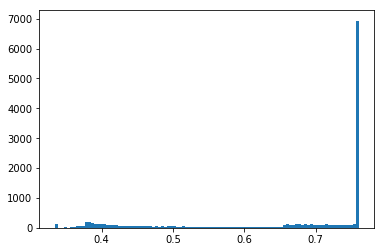

In [6]:
plt.hist(t['P_ONMASK'], 100)
plt.show()

In [7]:
# Match DEEP3 catalog to the weight table
deep2_idx = -1 * np.ones(len(deep2), dtype=int)
for index in range(len(deep2)):
    match = np.where((t['OBJNO']==deep2['objno_deep2'][index]) & (t['MJD']==deep2['mjd'][index]))[0]
    if (len(match)>1):
        raise ValueError('more than one match found!')
    deep2_idx[index] = match[0]

In [8]:
deep2['p_onmask'] = t['P_ONMASK'][deep2_idx]

0.333979
0.760847


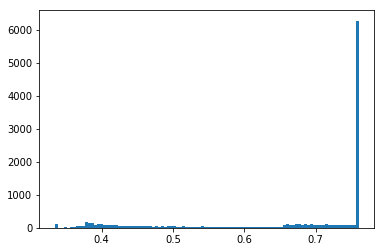

In [12]:
print(deep2['p_onmask'].min())
print(deep2['p_onmask'].max())
plt.hist(deep2['p_onmask'], 100)
plt.show()

In [13]:
deep2.write('/Users/roz18/Documents/Data/DESCQA-Color-Test/DEEP2_uniq_Terapix_Subaru_trimmed_wights_added.fits')